In [1]:
%matplotlib inline


# Animated 3D random walk



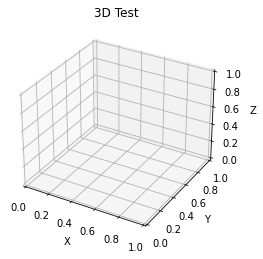

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def gen_rand_line(length, dims=2):
    """
    Create a line using a random walk algorithm.

    Parameters
    ----------
    length : int
        The number of points of the line.
    dims : int
        The number of dimensions of the line.
    """
    line_data = np.empty((dims, length))
    line_data[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = (np.random.rand(dims) - 0.5) * 0.1
        line_data[:, index] = line_data[:, index - 1] + step
    return line_data


def update_lines(num, data_lines, lines):
    for line, data in zip(lines, data_lines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines


# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Fifty lines of random 3-D lines
data = [gen_rand_line(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(
    fig, update_lines, 50, fargs=(data, lines), interval=50)

plt.show()

In [3]:
line_ani